In [1]:
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time

In [2]:
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/different_quench_2")
pr_1 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/different_quench/struct_mini")

# Old 
pr_3 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/amorphous_structure")     # Project name
pr_4 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/different_quench")

#cryst
pr_5 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/different_quench/static_2")

In [4]:
#for i in range(1, 50, 1):
#    job = pr["boilot_443K_2_05_amo_s_59_rate_%s_k_ps"%i]
#    job.transfer_from_remote()
#    job.compress() 

/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:56<00:00, 56.65s/it]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:32<00:00, 32.34s/it]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
cryst_old = pr_3['boilot_443K_2_05_cryt_300_5_3300_300k_new']
eng_cry_old = cryst_old['output/generic/energy_tot'][-1]

cryst_new = pr_5['nasicon_struct_mini_69']  # Crystal
eng_cry_new = cryst_new['output/generic/energy_tot'][-1]

In [4]:
cryst_old = pr_3['boilot_443K_2_05_cryt_300_5_3300_300k_new']
cryst_old['output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'steps', 'temperature', 'unwrapped_positions', 'velocities', 'volume']}

In [5]:
rate_f = range(1, 100, 1)
eng_combi_old = []
for i in rate_f:
    if i < 10:
        job = pr_4['boilot_443K_2_05_amo_%s__k_ps'%i]
        eng_combi_old.append(job['output/generic/energy_tot'][-1]-eng_cry_old)
    elif i == 10:
        job_1 = pr_3['boilot_443K_2_05_amo_300_5_623k_1273k_new']
        eng_combi_old.append(job_1['output/generic/energy_tot'][-1]-eng_cry_old)
    #elif i < 100:
    elif i < 51:
        job_2 = pr_4['boilot_443K_2_05_amo_rate_%s_k_ps'%i]
        eng_combi_old.append(job_2['output/generic/energy_tot'][-1]-eng_cry_old)

In [6]:
atoms = 1188
conv_f = 1e-6
eng_mev_p_atoms_old = []
for i in eng_combi_old:
    eng_mev_p_atoms_old.append(i*(1/atoms))

In [7]:
eng_combi_new = []
for i in rate_f:
    if i < 10:
        job = pr["boilot_443K_2_05_amo_rate_%s_k_ps"%i]
        eng_combi_new.append(job['output/generic/energy_tot'][-1]-eng_cry_new)
    elif i == 10:
        job_1 = pr["boilot_443K_2_05_amo_rate_10_k_ps"]
        eng_combi_new.append(job_1['output/generic/energy_tot'][-1]-eng_cry_new)
    #elif i < 85:
    elif i < 51:
        job_2 = pr["boilot_443K_2_05_amo_rate_%s_k_ps"%i]
        eng_combi_new.append(job_2['output/generic/energy_tot'][-1]-eng_cry_new)
    #elif i == 85:
    #    eng_combi_new.append(0)
    #elif i > 85:
    #    job_3 = pr["boilot_443K_2_05_amo_rate_%s_k_ps"%i]
    #    eng_combi_new.append(job_3['output/generic/energy_tot'][-1]-eng_cry_new)


In [8]:
atoms = 1188
conv_f = 1e-6
eng_mev_p_atoms_new = []
for i in eng_combi_new:
    eng_mev_p_atoms_new.append(i*(1/atoms))

In [9]:
min_e = min(eng_mev_p_atoms_new)

In [10]:
# Plotting the relative energy wrto q rates 
import matplotlib.pylab as plt

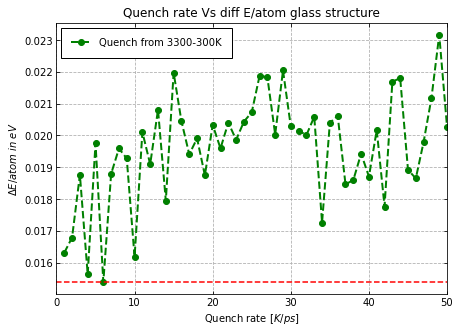

In [11]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.xlim([0, 50])
#plt.ylim([0.1, 0.250])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
#plt.plot(range(1, 51, 1), eng_mev_p_atoms_old, label="Quench from 3300-300K", color = 'blue', linestyle='--', marker='o', linewidth=2)
plt.plot(range(1, 51, 1), eng_mev_p_atoms_new, label="Quench from 3300-300K", color = 'green', linestyle='--', marker='o', linewidth=2)
#plt.axvspan(1, 20, color='red', alpha=0.5)
plt.axhline(y= min_e, color='red', linestyle='--')
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("Quench rate Vs diff E/atom glass structure")
plt.xlabel(r"Quench rate [$K/ps$]")
plt.ylabel("$\u0394E/atom$ $in$ $eV$")
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black") #, bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig("300k_amorphous_rdf_total_partial_mini.png", bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [15]:
# Import project for post processing 
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import ase.units as units
import pandas
from asap3 import*     # to plot RDF remember the function 
from asap3.analysis.rdf import RadialDistributionFunction 
# Rdf analysis (Partial vs total)
#cryst = cryst_new        # Last 50 steps for analysis 
amo_6 = pr['boilot_443K_2_05_amo_rate_6_k_ps']       # Last 50 steps for analysis

In [16]:
from pyiron import pyiron_to_ase
fin_cryt = pyiron_to_ase(cryst_new.get_final_structure())
fin_amo = pyiron_to_ase(amo_6.get_final_structure())

/tmp/ipykernel_221867/259969446.py:2: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  fin_cryt = pyiron_to_ase(cryst_new.get_final_structure())
2022-04-24 00:47:39,369 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-04-24 00:47:39,374 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-04-24 00:47:39,380 - pyiron_log - WARNING - Deprecated data structure! Returned array was con

In [17]:
from ase.io import read, write
write('nasicon_cryst_69_min.cif',fin_cryt)
write('nasicon_6Kps_mini.cif',fin_amo)

In [14]:
from ase.io.trajectory import Trajectory
import matplotlib as mpl 
from pylab import cm
from pyiron import pyiron_to_ase
rng = 8
bins = 200
crystal = []
for i in range(10, 50, 1):
    cryst_1 = pyiron_to_ase(cryst.get_structure(i))
    RDFobj = RadialDistributionFunction(cryst_1, rng, bins, verbose=True)
    rdf = RDFobj.get_rdf()
    x = np.arange(bins) * rng / bins
    plt.rcParams["figure.facecolor"] = "w"
    plt.rcParams["figure.figsize"] = (4.14,3.14)
    plt.xlim([0, 7])
    plt.ylim([0, 3.5])
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.tick_params(axis="y",direction="in")
    plt.tick_params(axis="x",direction="in")
    plt.plot(x, rdf, label="Sanpshot_%s"%i)
    plt.grid(which='both')
    plt.grid(True, linestyle='--')
    plt.title("Total RDF for NASICON (Crystal)")
    plt.xlabel(r"d [$\AA$]")
    plt.ylabel("$g_(r)$")
    plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=False)
    #plt.savefig("Crystal_structure_all.png", bbox_inches='tight', dpi=600, transparent=False)
    #plt.show()
    crystal.append(rdf)
plt.show()
plt.close()

NameError: name 'cryst' is not defined